This dataset is downloaded from UCI Machine Learning Repository to perfrom the Linear Regression. Given below is the link for the dataset.
https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength

In this dataset, we have to build a Linear Regression ML Model which can predict the Compresive Strength of the Concrete using the given dependent variables.
So, first of all lets, start with the reading of th edataset and loading everything onto the notebook.

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [35]:
ds = pd.read_csv('Concrete_Data.csv')
ds

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [36]:
ds.dtypes # checking the data types for each independent variable.

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object

In [37]:
ds.info() # checking the information of the given data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [38]:
ds.isnull().sum() # using isnull() to check if the dataset has any missing value or not.

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

<AxesSubplot:>

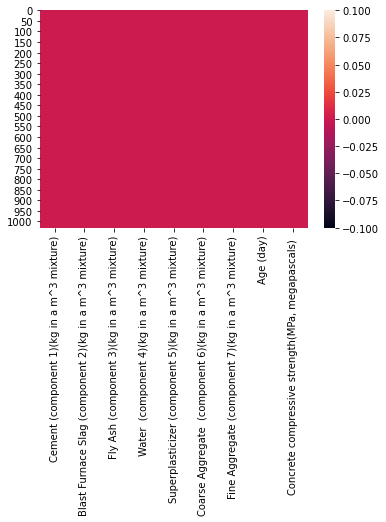

In [39]:
sns.heatmap(ds.isnull())

Using Descriptive Statistics for the data analysis.

In [40]:
ds.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Some insights can be drawn from the descriptive analysis.

    1 Standard deviation of Cement, Blast Furnace, Fly Ash, Coarse Aggregate, Fine Aggregate, Age is very high. So these data is highly spreaded.
    2  Blast Furnace, Fly Ash, Age have a large difference between mean and median, so the data in these colmns is skewed.
    3  Diff. bet 75% and max. value is very high in Age, cement, Blast Furnace, Fly Ash, Water, Fine Aggregate. So there are 
       outliers present in the data.

Now that we have got the insights from the data, we first proceed with removing the outliers from the dataset. Data is to be cleaned before any analysing can be done.

###########################################Using the z-score meathod. ########################################################

In [41]:
from scipy.stats import zscore

In [42]:
z_score = np.abs(zscore(ds))
#z_score = zscore(ds)
z_score

array([[2.47791487, 0.85688789, 0.84714393, ..., 1.21767004, 0.27973311,
        2.64540763],
       [2.47791487, 0.85688789, 0.84714393, ..., 1.21767004, 0.27973311,
        1.56142148],
       [0.49142531, 0.79552649, 0.84714393, ..., 2.24091709, 3.55306569,
        0.26662698],
       ...,
       [1.27008832, 0.75957923, 0.85063487, ..., 0.0801067 , 0.27973311,
        0.72572939],
       [1.16860982, 1.30806485, 0.84714393, ..., 0.19116644, 0.27973311,
        0.18253855],
       [0.19403325, 0.30849909, 0.3769452 , ..., 0.15074782, 0.27973311,
        0.20469738]])

In [43]:
#location_outliers = np.where((z_score < -3) | (z_score > 3))
#location_outliers
l = np.where(z_score > 3)
l

(array([  2,   3,   4,   6,  12,  17,  24,  25,  26,  30,  31,  33,  34,
         35,  41,  42,  56,  60,  61,  63,  65,  66,  76,  79,  99, 102,
        122, 125, 145, 148, 168, 171, 553, 559, 571, 584, 604, 610, 616,
        620, 622, 756, 769, 792, 798, 814, 820, 873, 936], dtype=int64),
 array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 3, 3], dtype=int64))

In [44]:
ds_new1 = ds[(z_score < 3).all(axis = 1)]
ds_new1

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


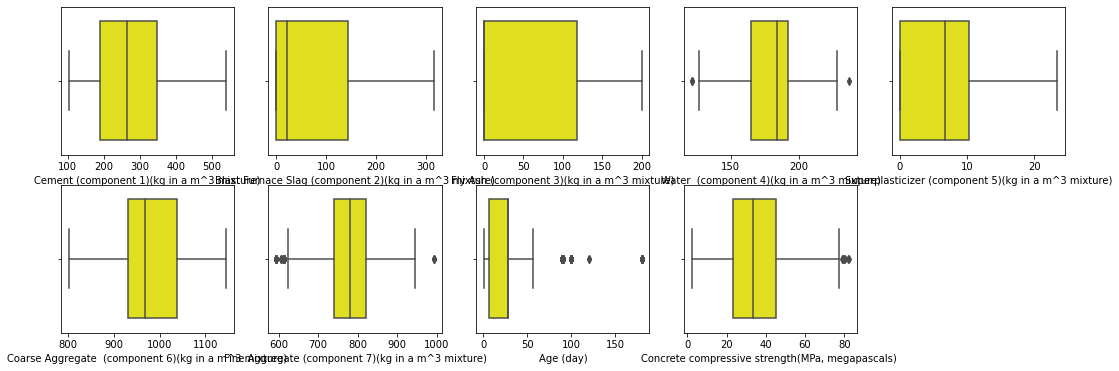

In [68]:
clist = ds.columns.values
plt.figure(figsize = (18, 6))
for i in range(0, len(clist)):
    plt.subplot(2, 5, i + 1)
    sns.boxplot(ds_new1[clist[i]], color = 'yellow')

################################################Using the IQR meathod##########################################################

In [20]:
q1_ds = ds.quantile(0.25) # 25th percentile.
q1_ds

Cement (component 1)(kg in a m^3 mixture)                192.375
Blast Furnace Slag (component 2)(kg in a m^3 mixture)      0.000
Fly Ash (component 3)(kg in a m^3 mixture)                 0.000
Water  (component 4)(kg in a m^3 mixture)                164.900
Superplasticizer (component 5)(kg in a m^3 mixture)        0.000
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     932.000
Fine Aggregate (component 7)(kg in a m^3 mixture)        730.950
Age (day)                                                  7.000
Concrete compressive strength(MPa, megapascals)           23.710
Name: 0.25, dtype: float64

In [23]:
q3_ds = ds.quantile(0.75) # 75th percentile
q3_ds

Cement (component 1)(kg in a m^3 mixture)                 350.000
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     142.950
Fly Ash (component 3)(kg in a m^3 mixture)                118.300
Water  (component 4)(kg in a m^3 mixture)                 192.000
Superplasticizer (component 5)(kg in a m^3 mixture)        10.200
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     1029.400
Fine Aggregate (component 7)(kg in a m^3 mixture)         824.000
Age (day)                                                  56.000
Concrete compressive strength(MPa, megapascals)            46.135
Name: 0.75, dtype: float64

In [24]:
iqr = q3_ds - q1_ds #inter quartile range
iqr 

Cement (component 1)(kg in a m^3 mixture)                157.625
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    142.950
Fly Ash (component 3)(kg in a m^3 mixture)               118.300
Water  (component 4)(kg in a m^3 mixture)                 27.100
Superplasticizer (component 5)(kg in a m^3 mixture)       10.200
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      97.400
Fine Aggregate (component 7)(kg in a m^3 mixture)         93.050
Age (day)                                                 49.000
Concrete compressive strength(MPa, megapascals)           22.425
dtype: float64

In [54]:
outliers = (ds < (q1_ds - (1.5 * iqr))) | (ds > (q3_ds + (1.5 * iqr)))
np.where(outliers)
#outliers

(array([   0,    2,    3,    4,    6,   12,   17,   19,   20,   23,   24,
          25,   26,   27,   30,   31,   32,   33,   34,   35,   39,   41,
          42,   43,   47,   50,   51,   56,   58,   60,   61,   63,   64,
          65,   66,   74,   76,   79,   97,   99,  102,  120,  122,  125,
         143,  145,  148,  153,  166,  168,  171,  181,  224,  225,  226,
         227,  228,  381,  553,  559,  603,  604,  609,  610,  615,  616,
         619,  620,  621,  622,  755,  756,  762,  768,  769,  791,  792,
         794,  795,  797,  798,  813,  814,  820,  823,  862,  873,  936,
        1019], dtype=int64),
 array([8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 4, 4, 6, 4, 4, 6, 4, 4,
        6, 4, 4, 8, 6, 4, 4, 8, 3, 3, 3, 3, 3, 8, 1, 1, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 3, 3,
        3], dtype=int64))

In [56]:
ds_new2 = ds[outliers == False] # dataset after removing the outliers.
ds_new2

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,NaN
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,NaN,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,NaN,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,NaN,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28.0,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28.0,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28.0,32.77


As we can see here that the outliers are removed and NaN values have filled the position of outliers.

In [57]:
ds_new2.isnull().sum() # null values in the dataset.

Cement (component 1)(kg in a m^3 mixture)                 0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     2
Fly Ash (component 3)(kg in a m^3 mixture)                0
Water  (component 4)(kg in a m^3 mixture)                 9
Superplasticizer (component 5)(kg in a m^3 mixture)      10
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      0
Fine Aggregate (component 7)(kg in a m^3 mixture)         5
Age (day)                                                59
Concrete compressive strength(MPa, megapascals)           4
dtype: int64

We now have to remove these null values to obtain the clean dataset.

WE USE THE DROPNA() FUNCTION TO DROP TH EROWS WITH NAN VALUES.

In [58]:
ds_new2 = ds_new2.dropna() # this will drop th erows with NaN values in them.
ds_new2

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90.0,47.03
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28.0,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28.0,39.29
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28.0,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28.0,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28.0,32.77


Now the outliers are removed using the IQR meathod.

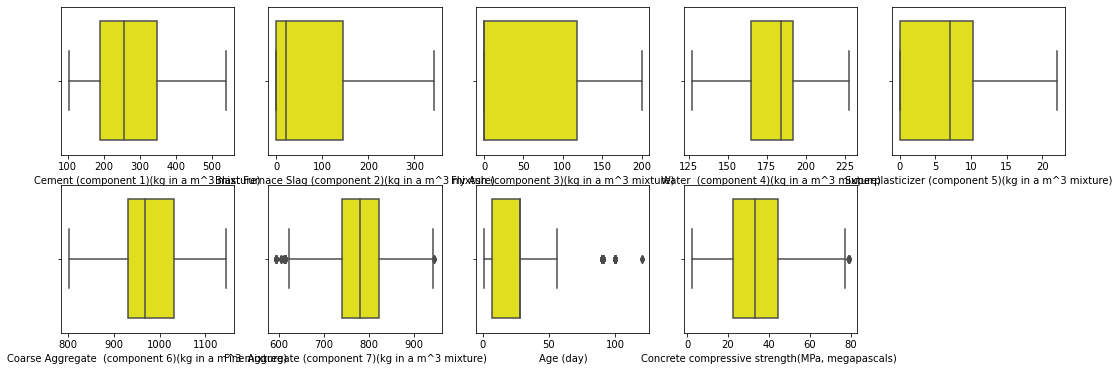

In [69]:
#Checking outliers with boxplot.
plt.figure(figsize = (18, 6))
for i in range(0, len(clist)):
    plt.subplot(2, 5, i +1)
    sns.boxplot(ds_new2[clist[i]], color = 'yellow')

#####################################################Skewness################################################################

After the outliers are removed, we now check the skewness of the dataset using the distplot.

In [79]:
ds.skew()

Cement (component 1)(kg in a m^3 mixture)                0.509481
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0.800717
Fly Ash (component 3)(kg in a m^3 mixture)               0.537354
Water  (component 4)(kg in a m^3 mixture)                0.074628
Superplasticizer (component 5)(kg in a m^3 mixture)      0.907203
Coarse Aggregate  (component 6)(kg in a m^3 mixture)    -0.040220
Fine Aggregate (component 7)(kg in a m^3 mixture)       -0.253010
Age (day)                                                3.269177
Concrete compressive strength(MPa, megapascals)          0.416977
dtype: float64

As we see above that the Age variable of the dataset waas highly skewed. But now lets check the skewness after the outliers removal

In [80]:
ds_new2.skew()

Cement (component 1)(kg in a m^3 mixture)                0.523611
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0.762181
Fly Ash (component 3)(kg in a m^3 mixture)               0.420481
Water  (component 4)(kg in a m^3 mixture)                0.071846
Superplasticizer (component 5)(kg in a m^3 mixture)      0.275292
Coarse Aggregate  (component 6)(kg in a m^3 mixture)    -0.107667
Fine Aggregate (component 7)(kg in a m^3 mixture)       -0.285540
Age (day)                                                1.241203
Concrete compressive strength(MPa, megapascals)          0.454220
dtype: float64

Now, we see above that the skewness of the Age variable of the dataset is significantly reduced

###############################################Correlation####################################################################

Now we find the correlation between the independent variables and the dependent variable.

In [142]:
ds_new2.corr()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
Cement (component 1)(kg in a m^3 mixture),1.000000,-0.262949,-0.373968,-0.088639,0.032001,-0.099472,-0.239603,-0.036289,0.476763
Blast Furnace Slag (component 2)(kg in a m^3 mixture),-0.262949,1.000000,-0.351422,0.113790,0.043895,-0.290074,-0.295298,-0.036781,0.141416
Fly Ash (component 3)(kg in a m^3 mixture),-0.373968,-0.351422,1.000000,-0.250416,0.453972,-0.038463,0.064153,0.054812,-0.054794
Water (component 4)(kg in a m^3 mixture),-0.088639,0.113790,-0.250416,1.000000,-0.641187,-0.208393,-0.364145,-0.022208,-0.369219
Superplasticizer (component 5)(kg in a m^3 mixture),0.032001,0.043895,0.453972,-0.641187,1.000000,-0.224616,0.114265,0.045529,0.402702
Coarse Aggregate (component 6)(kg in a m^3 mixture),-0.099472,-0.290074,-0.038463,-0.208393,-0.224616,1.000000,-0.179809,0.021818,-0.168207
Fine Aggregate (component 7)(kg in a m^3 mixture),-0.239603,-0.295298,0.064153,-0.364145,0.114265,-0.179809,1.000000,0.045744,-0.156866
Age (day),-0.036289,-0.036781,0.054812,-0.022208,0.045529,0.021818,0.045744,1.000000,0.517506
"Concrete compressive strength(MPa, megapascals)",0.476763,0.141416,-0.054794,-0.369219,0.402702,-0.168207,-0.156866,0.517506,1.000000


Pllotting the correlation on heatmap.

<AxesSubplot:>

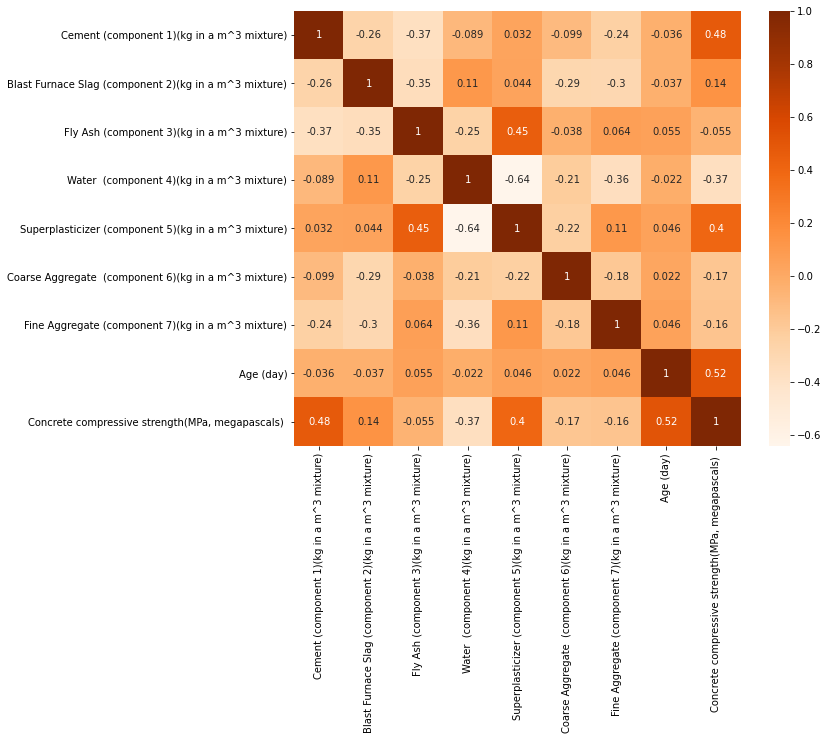

In [143]:
plt.figure(figsize = (10, 8))
sns.heatmap(ds_new2.corr(),cmap = 'Oranges', annot = True)

From the above correlation, we can say that the Concrete Strength variable is dependent on Age and the Cement component. 

Now that we have completed the EDA, we now move ahead in fitting the Linear Regression Model.

In [144]:
x = ds_new2.iloc[:,0:-1]
x # This is the Independent Vriables or the attributes.

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90.0
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28.0
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28.0
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28.0
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28.0
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28.0


In [146]:
y = ds_new2.iloc[:,-1]
y # This is the Target or Label or Dependent Variable.

1       61.89
5       47.03
7       36.45
8       45.85
9       39.29
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Concrete compressive strength(MPa, megapascals) , Length: 941, dtype: float64

Now, we split the data into training data and testing data for both the phase.

In [179]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 20) #splitting the data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(705, 8)
(705,)
(236, 8)
(236,)


In [180]:
lr = LinearRegression() # Making a instance of the linear regression model so it can be called.

In [181]:
lr.fit(x_train, y_train)

LinearRegression()

The Linear Regression Model for the given dataset is now fitted. We can now perform various metrics on the model to check its effeciency.

In [182]:
lr.score(x_train, y_train) # checking the score or accuracy of model

0.7746840899528757

In [183]:
lr.score?

Now, we predict the values of the output using testing input data so that they can be compared to the actual values.

In [184]:
pred = lr.predict(x_test)
#print(f"The predicted values for test data by the model are {pred}")
#print(f"The actual values for test data by the model are {y_test}")
a = y_test - pred
print(f"Difference between actual values and predicted values is {a}")

Difference between actual values and predicted values is 666   -14.412396
103    -2.090385
849    -4.061829
450    14.875407
883     0.462387
         ...    
91    -11.153372
498     6.580098
49      7.039008
363     2.402862
447     9.737427
Name: Concrete compressive strength(MPa, megapascals) , Length: 236, dtype: float64


################################################Calculating the error########################################################

In [185]:
print("The mean absolute error of the fitted model is", mean_absolute_error(y_test, pred))
print("The mean squared error of the fitted model is", mean_squared_error(y_test, pred))
print("The root mean squared error of the fitted model is", np.sqrt(mean_squared_error(y_test, pred)))

The mean absolute error of the fitted model is 7.001189765200873
The mean squared error of the fitted model is 79.27105592409372
The root mean squared error of the fitted model is 8.90342944735868


In [186]:
from sklearn.metrics import r2_score
print("The r2 score of the fitted model is", r2_score(y_test, pred))

The r2 score of the fitted model is 0.7569618091552881
